In [42]:
import pandas as pd
import numpy as np

In [46]:
def External_indices_validation(predicted, labels, info_for_clusters=False):
    '''Clustering validation for unsupervised learning using external indices.
    Input:
        info_for_clustering: 
            True: Prints percentages of clusters containing each label
            False: Prints percentages of labels in each cluster
        
    Output:
       '''
    
    #####
    if not info_for_clusters:
        lst = []
        tmp = []
        for rating in sorted(labels.unique()):
            for ind, val in enumerate(labels):
                if val == rating:
                    tmp.append(predicted[ind])

            lst.append((rating, tmp))
            tmp = []


        #print statistics for each cluster
        for ind, sublist in lst:
            c = Counter(sublist)
            tmp = [(i, c[i] / len(sublist) * 100.0) for i, count in c.most_common()]
            print (f'Info for rating={ind} \n')
            for el in tmp:
                print(f'{el[1]:.2f} % in cluster {el[0]}')
            print ('\n')
    else:
        # create a list that on index i includes all the values of the labels under cluster #i
        lst = [[] for _ in range(len(np.unique(predicted)))]
        for ind, val in enumerate(predicted):
            lst[val].append(labels.values[ind])

        #print statistics for each cluster
        for ind,sublist in enumerate(lst):
            c = Counter(sublist)
            tmp = [(i, c[i] / len(sublist) * 100.0) for i, count in c.most_common()]
            print (f'Info for cluster #{ind} \n')
            for el in tmp:
                print(f'{el[1]:.2f} % of rating {el[0]}')
            print ('\n')

In [3]:
red = pd.read_csv('./csv_cache/red_clean.csv', delimiter='\t',index_col=0)

In [4]:
red.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
red_X = red.drop(labels='quality', axis=1)
red_y = red['quality']

In [6]:
red_y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [52]:
from collections import Counter
from sklearn.cluster import KMeans,MeanShift,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(red_X, red_y, test_size=0.4, random_state=1)

In [108]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X_train)
predicted = kmeans.predict(X_test)

External_indices_validation(predicted, y_test, info_for_clusters=False)


Info for rating=3 

100.00 % in cluster 0


Info for rating=4 

30.77 % in cluster 18
30.77 % in cluster 6
7.69 % in cluster 22
7.69 % in cluster 27
7.69 % in cluster 25
7.69 % in cluster 7
7.69 % in cluster 13


Info for rating=5 

7.84 % in cluster 18
7.35 % in cluster 23
7.35 % in cluster 1
6.37 % in cluster 13
5.88 % in cluster 12
5.39 % in cluster 9
4.90 % in cluster 0
4.41 % in cluster 19
4.41 % in cluster 20
4.41 % in cluster 25
3.92 % in cluster 29
3.43 % in cluster 10
3.43 % in cluster 4
2.94 % in cluster 7
2.94 % in cluster 8
2.45 % in cluster 28
2.45 % in cluster 21
2.45 % in cluster 14
2.45 % in cluster 26
1.96 % in cluster 6
1.96 % in cluster 22
1.96 % in cluster 27
1.96 % in cluster 5
1.47 % in cluster 17
1.47 % in cluster 15
1.47 % in cluster 24
1.47 % in cluster 2
0.98 % in cluster 11
0.49 % in cluster 3


Info for rating=6 

9.05 % in cluster 10
7.14 % in cluster 18
6.67 % in cluster 28
6.67 % in cluster 1
6.67 % in cluster 7
6.19 % in cluster 29
6.19 % in cluster 6
5.

In [110]:
print(f'cluster#2\n\n{pd.DataFrame(kmeans.cluster_centers_,columns=red_X.columns).iloc[18]}\n')
print(f'cluster#4\n\n{pd.DataFrame(kmeans.cluster_centers_,columns=red_X.columns).iloc[23]}\n')

cluster#2

fixed_acidity            8.412121
volatile_acidity         0.530530
citric_acid              0.271061
residual_sugar           2.137121
chlorides                0.078152
free_sulfur_dioxide      5.621212
total_sulfur_dioxide    13.636364
density                  0.996502
ph                       3.323030
sulphates                0.616515
alcohol                 10.653788
Name: 18, dtype: float64

cluster#4

fixed_acidity            8.235294
volatile_acidity         0.550441
citric_acid              0.232059
residual_sugar           2.226471
chlorides                0.082471
free_sulfur_dioxide     10.411765
total_sulfur_dioxide    38.500000
density                  0.997225
ph                       3.344118
sulphates                0.620294
alcohol                  9.938235
Name: 23, dtype: float64



In [84]:
pd.DataFrame(kmeans.cluster_centers_,columns=red_X.columns).iloc[4]

fixed_acidity            8.696552
volatile_acidity         0.511552
citric_acid              0.290000
residual_sugar           2.217241
chlorides                0.079241
free_sulfur_dioxide      6.517241
total_sulfur_dioxide    18.189655
density                  0.996755
ph                       3.278966
sulphates                0.640517
alcohol                 10.330172
Name: 4, dtype: float64

In [76]:
kmeans.cluster_centers_[2].shape

(11,)

In [92]:
MeanS = MeanShift(n_jobs=-1)
MeanS.fit(X_train)
predictedMs = MeanS.predict(X_test)
External_indices_validation(predictedMs, y_test, info_for_clusters=True)

Info for cluster #0 

47.70 % of rating 6
36.49 % of rating 5
12.07 % of rating 7
2.87 % of rating 4
0.57 % of rating 8
0.29 % of rating 3


Info for cluster #1 

59.23 % of rating 5
33.85 % of rating 6
4.62 % of rating 7
2.31 % of rating 4




In [ ]:
print(f'cluster#2\n\n{pd.DataFrame(MeanS.cluster_centers_,columns=red_X.columns).iloc[2]}\n')
print(f'cluster#4\n\n{pd.DataFrame(MeanS.cluster_centers_,columns=red_X.columns).iloc[4]}\n')

In [55]:
Dbs = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
predictedDbs = Dbs.fit_predict(X_test)

External_indices_validation(predictedDbs, y_test, info_for_clusters=True)

Info for cluster #0 

43.93 % of rating 6
42.68 % of rating 5
10.04 % of rating 7
2.72 % of rating 4
0.42 % of rating 8
0.21 % of rating 3




In [61]:
Agg = AgglomerativeClustering(n_clusters=30)
predictedAgg = Agg.fit_predict(X_test)

External_indices_validation(predictedAgg, y_test, info_for_clusters=False)

Info for rating=3 

100.00 % in cluster 16


Info for rating=4 

46.15 % in cluster 14
15.38 % in cluster 13
7.69 % in cluster 29
7.69 % in cluster 17
7.69 % in cluster 3
7.69 % in cluster 23
7.69 % in cluster 9


Info for rating=5 

8.33 % in cluster 13
8.33 % in cluster 2
6.86 % in cluster 7
6.37 % in cluster 3
5.88 % in cluster 0
4.41 % in cluster 6
4.41 % in cluster 12
3.92 % in cluster 14
3.92 % in cluster 27
3.43 % in cluster 5
3.43 % in cluster 21
3.43 % in cluster 1
3.43 % in cluster 28
3.43 % in cluster 9
2.94 % in cluster 15
2.94 % in cluster 22
2.94 % in cluster 16
2.45 % in cluster 10
2.45 % in cluster 4
2.45 % in cluster 17
1.96 % in cluster 23
1.96 % in cluster 8
1.96 % in cluster 29
1.96 % in cluster 24
1.47 % in cluster 11
1.47 % in cluster 26
1.47 % in cluster 20
0.98 % in cluster 19
0.98 % in cluster 18


Info for rating=6 

12.38 % in cluster 13
10.95 % in cluster 5
8.10 % in cluster 7
7.62 % in cluster 3
6.67 % in cluster 14
5.71 % in cluster 0
5.71 % in cluster 16


In [91]:
print(f'cluster#2\n\n{pd.DataFrame(MeanS.cluster_centers_,columns=red_X.columns).iloc[2]}\n')
print(f'cluster#4\n\n{pd.DataFrame(MeanS.cluster_centers_,columns=red_X.columns).iloc[4]}\n')

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

In [96]:
Dbs.core_sample_indices_

array([], dtype=int64)

In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z=linkage(X_test)


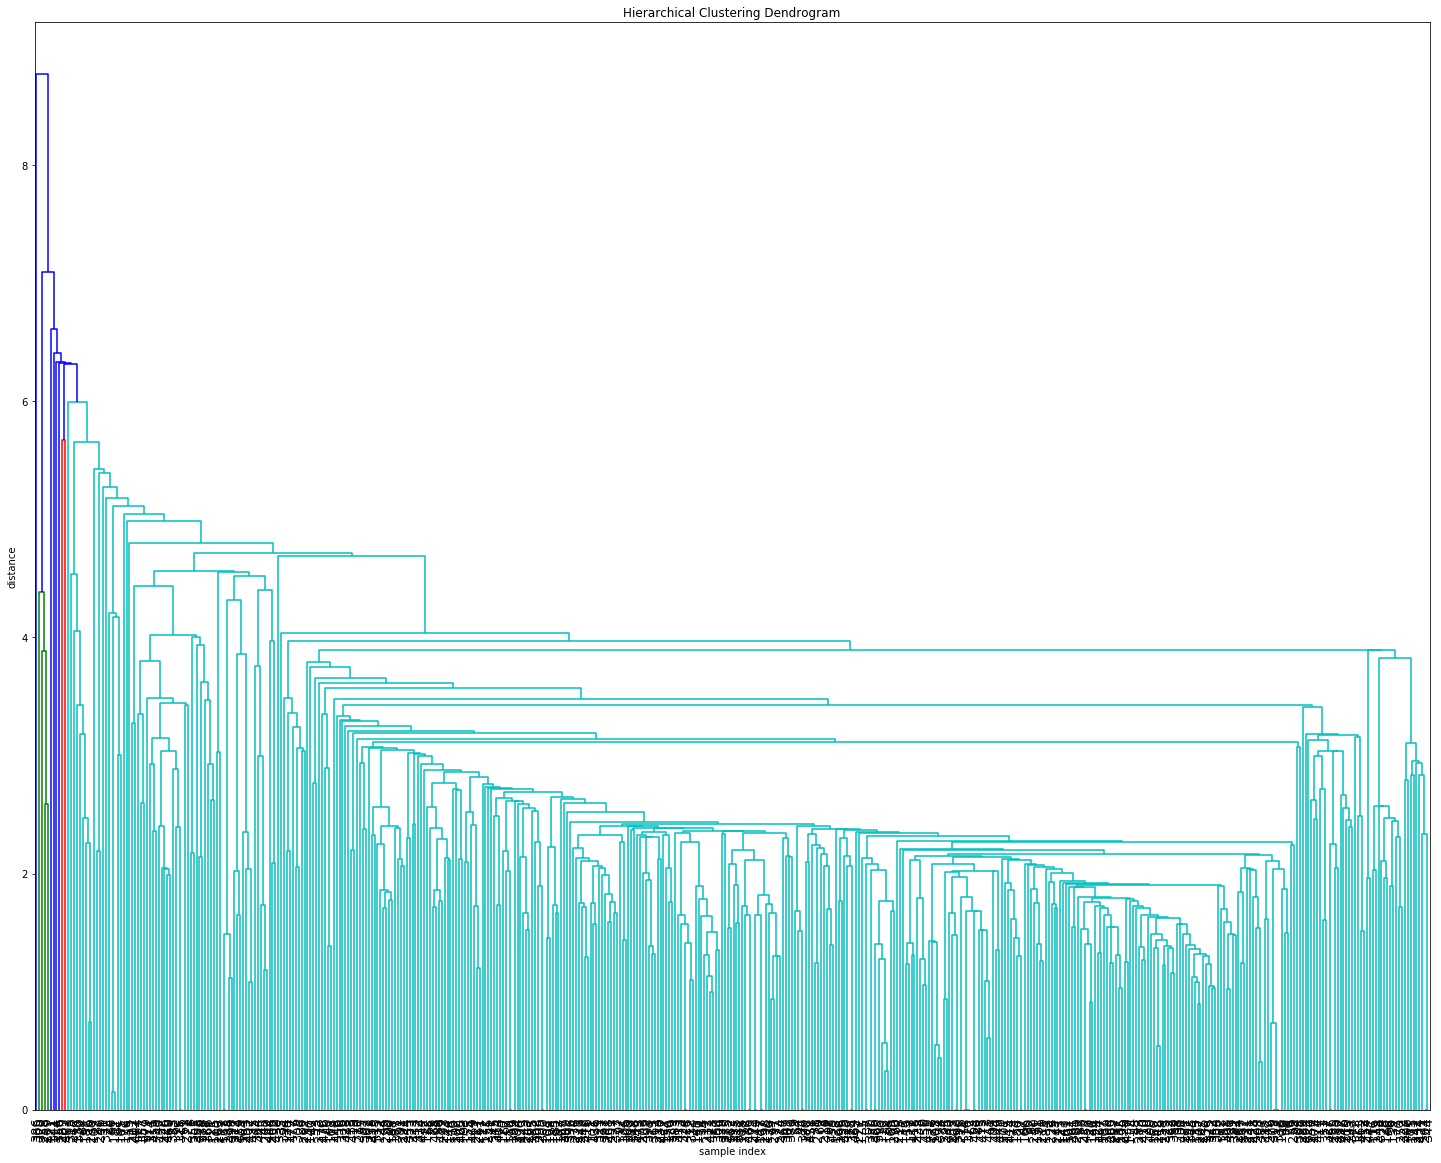

In [104]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=13.,  # font size for the x axis labels
)
plt.show()